In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np

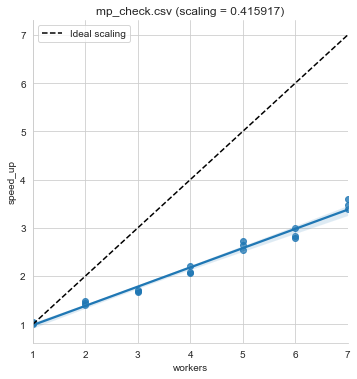

Ideal scaling has gradient 1. Observed scaling: 0.415917


,secs_per_1000_rays,throughput_rays_per_sec,thrown,took,speed_up
workers,,,,,
1.0,34.766407,28.772056,5000.0,173.832036,1.023111
2.0,24.647051,40.590759,5000.0,123.235257,1.443374
3.0,20.990352,47.645110,5000.0,104.951759,1.694221
4.0,16.796765,59.586935,5000.0,83.983824,2.118862
5.0,13.523592,74.005464,5000.0,67.617959,2.631573
6.0,12.412531,80.639240,5000.0,62.062657,2.867465
7.0,10.207942,98.016794,5000.0,51.039709,3.485396


In [12]:
def process(filename):
    df = pd.read_csv(filename, index_col=0)
    df["speed_up"] = df.throughput_rays_per_sec.values/df.throughput_rays_per_sec.values[0]

    def lin(x, m):
        """Fitting speed-up so want this to go through (1, 1)"""
        return m * x + 0.5

    popt, _ = curve_fit(lin, df.workers.values, df.speed_up.values)
    m = popt[0]
    c = 0.5
    sns.set_style("whitegrid")
    sns.lmplot(x="workers", y="speed_up", data=df)
    x = np.arange(np.min(df.workers), np.max(df.workers)+1)
    plt.plot(x, x, "k--", label="Ideal scaling")
    plt.legend()
    plt.title(f"{filename} (scaling = {m:f})")
    plt.show()

    print(f"Ideal scaling has gradient 1. Observed scaling: {m:f}")

    return df, m, c

df, m, c = process("mp_check.csv")
df_ave = df.groupby("workers").mean()
df_ave = df_ave.drop(columns="rep")
df_ave

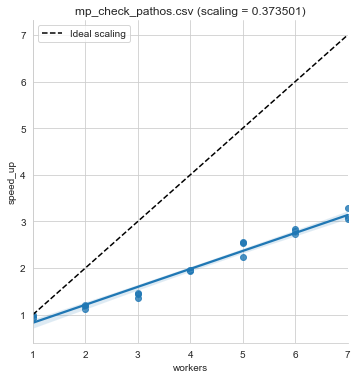

Ideal scaling has gradient 1. Observed scaling: 0.373501


,secs_per_1000_rays,throughput_rays_per_sec,thrown,took,speed_up
workers,,,,,
1.0,35.500513,28.202170,5000.0,177.502565,0.959566
2.0,28.936621,34.587688,5000.0,144.683103,1.176831
3.0,23.977011,41.750319,5000.0,119.885053,1.420536
4.0,17.483971,57.196539,5000.0,87.419854,1.946087
5.0,13.949669,71.936650,5000.0,69.748345,2.447612
6.0,12.221351,81.839162,5000.0,61.106753,2.784541
7.0,10.843916,92.310335,5000.0,54.219581,3.140818


In [13]:
df2, m2, c2 = process("mp_check_pathos.csv")
df2_ave = df2.groupby("workers").mean()
df2_ave = df2_ave.drop(columns="rep")
df2_ave

In [14]:
df_all = df.merge(df2, on=["workers"])

Text(0.5, 1.0, 'Raytracing scaling')

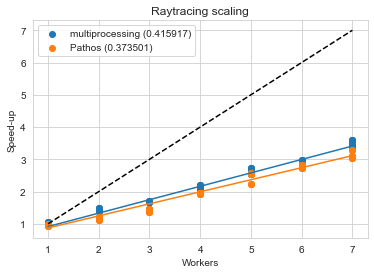

In [23]:
x = np.arange(1, np.max(df.workers)+1)
plt.scatter(df_all.workers, df_all.speed_up_x, color=sns.color_palette()[0], label=f"multiprocessing ({m:f})")
plt.plot(x, m*x + c, color=sns.color_palette()[0])


plt.scatter(df_all.workers, df_all.speed_up_y, color=sns.color_palette()[1], label=f"Pathos ({m2:f})")
plt.plot(x, m2*x + c2, color=sns.color_palette()[1])

plt.plot(x, x, "k--")
plt.xlabel("Workers")
plt.ylabel("Speed-up")
plt.legend()
plt.title("Raytracing scaling")